# Introdução

Um desafio frequentes nas empresas é determinar quais estratégias de marketing são as mais eficazes para compor o plano de crescimento.

Para superar esse desafio as empresas recorrem aos testes de hipótese. Teste de hipóteses são ferramentas para verificar a veracidade de suposições. Ou seja, a partir de uma amostra, inferir sobre uma população.

Os teste de hipóteses se dividem em dois grupos. Paramétricos e não-paramétricos. Para dados quantitativos, que obedecem a alguns pressupostos, utiliza-se testes paramétricos. Para dados qualitativos ou que não atendam aos pressupostos, usa-se os testes não-paramétricos.

No ambiente do marketing digital os teste de hipóteses ficaram conhecidos como teste A/B. 
Geralmente o objetivo é verificar qual versão de uma variável promoveu o melhor resultado. 
Essa variável pode ser uma página da web, um elemento da página, um banner ou até uma campanha.

O dataset que utilizado nesse projeto foi obtido no Kaggle e possui informações sobre uma campanha de divulgação. Usuários foram impactados por dois tipos de campanha. No primeiro tipo o usuário viu apenas PSA (public service announcement). Na segunda o usuário além da PSA foi impactada por anúncios.

Os dados incluem:
- user id: ID do usuário, 
- test group: Grupo ao qual pertence (anúncio ou anúncio de utilidade pública), 
- converted: Se o usuário realizou uma compra (conversão), 
- total ads: A quantidade total de anúncios vistos pelo usuário, 
- most ads day: O dia em que o usuário viu a maior quantidade de anúncios 
- most ads hour: A hora do dia em que isso ocorreu.



O objetivo é analisar os dois grupos e identificar se os anúncios foram relevantes para decisão de compra. 

Como os dados são qualitativos, serão utilizados teste não-paramétricos.

No decorrer deste projeto, iremos explorar e visualizar os dados e oferecer insights que ajudarão as empresa.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats

In [2]:
# Carregando base de dados
dataset = pd.read_csv('/home/tomas/Documentos/Projetos/Teste Estatístico/marketing_AB.csv')
display(dataset)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [3]:
# Removendo coluna 'Unnamed: 0'
dataset = dataset.drop(axis=1, columns='Unnamed: 0')

# Substituindo espaço por _ no nomes das colunas
dataset.columns = np.array(pd.Series(dataset.columns).apply(lambda x: x.replace(' ', '_')))

# Substituindo True and False por 1 e 0 respectivamente.
mapping = {True: 1, False: 0}
dataset['converted'] = dataset['converted'].map(mapping)

#definindo 'user_id' como index do dataset
dataset = dataset.set_index('user_id')

print(dataset.info())
display(dataset)

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 1069124 to 1237779
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test_group     588101 non-null  object
 1   converted      588101 non-null  int64 
 2   total_ads      588101 non-null  int64 
 3   most_ads_day   588101 non-null  object
 4   most_ads_hour  588101 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 26.9+ MB
None


,test_group,converted,total_ads,most_ads_day,most_ads_hour
user_id,,,,,
1069124,ad,0,130,Monday,20
1119715,ad,0,93,Tuesday,22
1144181,ad,0,21,Tuesday,18
1435133,ad,0,355,Tuesday,10
1015700,ad,0,276,Friday,14
...,...,...,...,...,...
1278437,ad,0,1,Tuesday,23
1327975,ad,0,1,Tuesday,23
1038442,ad,0,3,Tuesday,23


## Análise Exploratória

### test group

In [4]:
#Verificando a contagem de cada uma das classes
print(dataset['test_group'].value_counts(normalize=True))

test_group
ad     0.96
psa    0.04
Name: proportion, dtype: float64


In [5]:
#Calculando a taxa de conversão por grupo de test
conversion_rates = dataset.groupby('test_group')["converted"].mean()
print(conversion_rates)

test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [6]:
dataset.total_ads.describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64

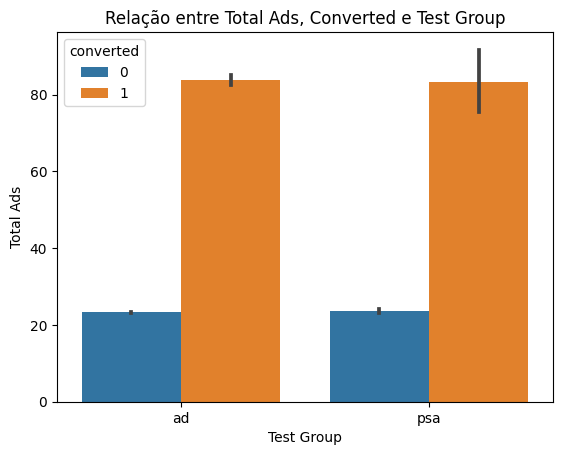

In [7]:
# Comparando a relação entre a variável "total_ads" e a variável "converted" para as duas categórias de 'test_group'

sns.barplot(x='test_group', y='total_ads', hue='converted', data=dataset)


plt.xlabel('Test Group')
plt.ylabel('Total Ads')
plt.title('Relação entre Total Ads, Converted e Test Group')

# Show the plot
plt.show()

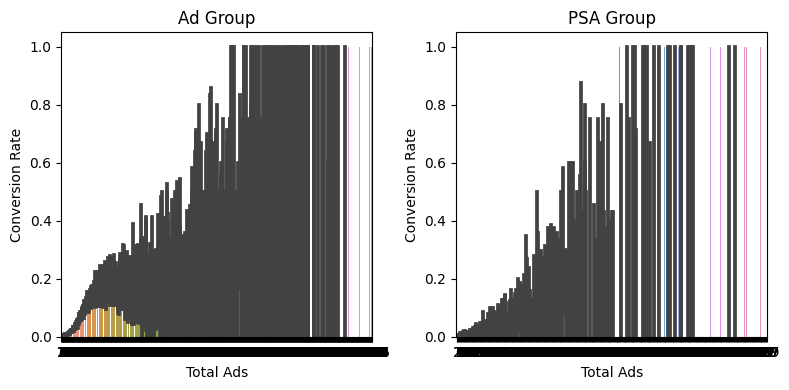

In [8]:
# Comparando a relação entre a variável "total_ads" e a variável "converted" para as duas categórias de 'test_group'

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.barplot(x="total_ads",  y="converted", data=dataset[dataset["test_group"] == "ad"], ax=ax[0])
ax[0].set(title="Ad Group", xlabel="Total Ads", ylabel="Conversion Rate")

sns.barplot(x="total_ads", y="converted", data=dataset[dataset["test_group"] == "psa"], ax=ax[1])
ax[1].set(title="PSA Group", xlabel="Total Ads", ylabel="Conversion Rate")

plt.tight_layout()
plt.show()

### converted

converted
0    0.974761
1    0.025239
Name: proportion, dtype: float64

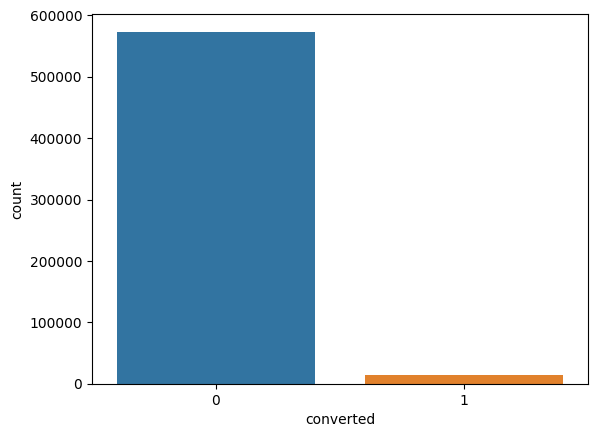

In [9]:
# Verificando frequência do evento converteu

display(dataset['converted'].value_counts(normalize=True))
sns.countplot(x='converted', data=dataset)
plt.show()

test_group,ad,psa
converted,,
0,550154,23104
1,14423,420


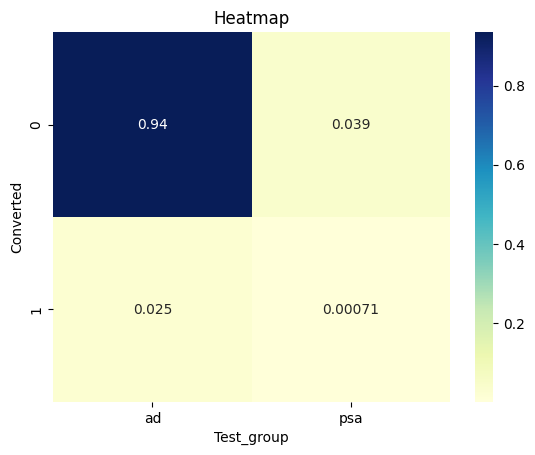

In [10]:
# Criando uma tabela de contagem
cross_tab = pd.crosstab(dataset['converted'], dataset['test_group'])

# Criando uma tabela de contagem com valores relativos
cross_tab_norm = pd.crosstab(dataset['converted'], dataset['test_group'], normalize=True)
display(cross_tab)


# Heatmap
sns.heatmap(cross_tab_norm, annot=True, cmap='YlGnBu')

plt.xlabel('Test_group')
plt.ylabel('Converted')
plt.title('Heatmap')

plt.show()

### total_ads

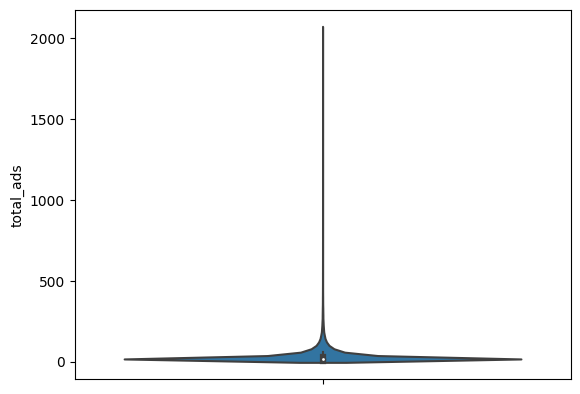

In [11]:
# Distribuição da variáviel total_ads

sns.violinplot(y='total_ads', data=dataset)
plt.show()

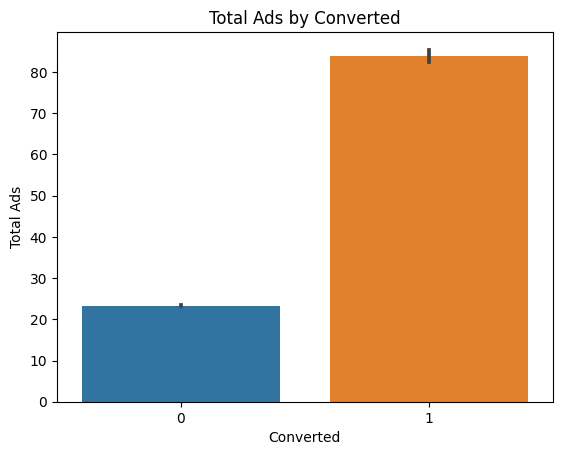

In [12]:
sns.barplot(x='converted', y='total_ads', data=dataset)

plt.xlabel('Converted')
plt.ylabel('Total Ads')
plt.title('Total Ads by Converted')

plt.show()

### most_ads_day

In [13]:
# Valores únicos na varável
for day in dataset.most_ads_day.unique():
    print(day)

Monday
Tuesday
Friday
Saturday
Wednesday
Sunday
Thursday


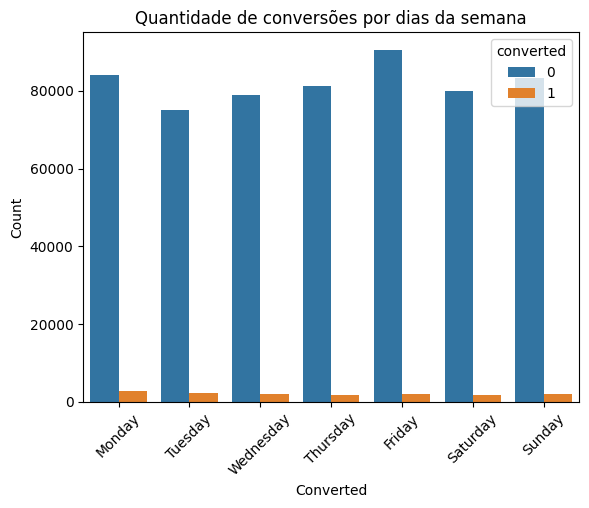

In [14]:
# Verificando a conversão por dia da semana

sns.countplot(x='most_ads_day', hue='converted', data=dataset, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Quantidade de conversões por dias da semana')

plt.xticks(rotation=45)

plt.show()

In [15]:
#Tabela com a taxa de conversão por dia da semana por grupo de teste
conversion_by_day = dataset.groupby(by=['most_ads_day', 'test_group'])['converted'].mean().unstack(level=1).sort_values(by=["ad", "psa"], ascending=False)
conversion_by_day

test_group,ad,psa
most_ads_day,,
Monday,0.033241,0.022559
Tuesday,0.030440,0.014448
Wednesday,0.025356,0.015759
Sunday,0.024620,0.020595
Friday,0.022465,0.016303
Thursday,0.021637,0.020230
Saturday,0.021307,0.013996


In [16]:
# Gráfico com a taxa de conversão por dia da semana agrupado por grupo de teste
fig = go.Figure()

fig.add_trace(go.Bar(x=conversion_by_day.index,
                     y=conversion_by_day['ad'],
                     name='Ad',
                     marker_color='blue'))


fig.add_trace(go.Bar(x=conversion_by_day.index,
                     y=conversion_by_day['psa'],
                     name='PSA',
                     marker_color='orange'))
                     #base=conversion_by_day['ad']


fig.update_layout(title="Taxa de Conversão por dia da semana",
                  xaxis_title="Dia da semana",
                  yaxis_title="Taxa de conversão",
                  barmode='group')

fig.show()

### most_ads_hour

In [17]:
# Valores únicos na variável
dataset.most_ads_hour.unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5])

In [18]:
# Tabela com a taxa de conversão por hora do dia agrupado por grupo de teste
conversion_by_hour = dataset.groupby(by=['most_ads_hour', 'test_group'])['converted'].mean().unstack(level=1).sort_values(by=["ad", "psa"], ascending=False)
display(conversion_by_hour)

test_group,ad,psa
most_ads_hour,,
16,0.030893,0.028055
20,0.030274,0.017642
15,0.029845,0.025164
21,0.029175,0.022202
14,0.028575,0.016051
17,0.028537,0.020246
18,0.027470,0.025177
19,0.026809,0.024514
22,0.026455,0.016358


In [19]:
# Gráfico com a taxa de conversão por hora do dia agrupado por grupo de teste

fig = go.Figure()
fig.add_trace(go.Bar(x=conversion_by_hour.index,
                     y=conversion_by_hour['ad'],
                     name='Ad',
                     marker_color='blue'))


fig.add_trace(go.Bar(x=conversion_by_hour.index,
                     y=conversion_by_hour['psa'],
                     name='PSA',
                     marker_color='orange'))


fig.update_layout(title="Taxa de Conversão por hora do dia",
                  xaxis_title="Hora do dia",
                  yaxis_title="Taxa de Conversão",
                  barmode='group')

fig.show()

In [20]:
print('A taxa de conversão para o grupo ad é de {:.2f}%'.format(conversion_rates['ad'] * 100))
print('A taxa de conversão para o grupo PSA é de {:.2f}%'.format(conversion_rates['psa'] * 100))

A taxa de conversão para o grupo ad é de 2.55%
A taxa de conversão para o grupo PSA é de 1.79%


# Aplicando Modelo de Árvore para entender o comportamento dos dados

In [21]:
# Substituindo 'ad' e 'psa' por 1 e 0 respectivamente.
mapping = {'ad': 1, 'psa': 0}
dataset['test_group'] = dataset['test_group'].map(mapping)

# Substituindo os dias da semana por número.
mapping = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6,  'Sunday':7}
dataset['most_ads_day'] = dataset['most_ads_day'].map(mapping)
from sklearn.tree import DecisionTreeClassifier

X, y = dataset.drop(columns='converted'), dataset['converted']

# Como os dados são desbalanceados, ponderarei as classes 
unique_classes, class_counts = np.unique(y, return_counts=True)
class_weights = dict()

# Calculando a razão entre as classes
class_ratio = class_counts[0] / class_counts[1]

# Atribuindo pesos para cada uma das classes
class_weights[unique_classes[0]] = 1.0  # Classe mais frequente
class_weights[unique_classes[1]] = class_ratio  # Classe menos frequente

print(class_weights)
clf = DecisionTreeClassifier(max_depth=4, 
                             random_state=59,
                             class_weight=class_weights
                             )
clf = clf.fit(X, y)
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 12), dpi=800) 
plot_tree(clf,
          feature_names=X.columns,
          class_names=True, 
          filled=True, 
          #proportion=False,
          )
plt.show()

{0: 1.0, 1: 38.62143771474769}


Aplicando o modelo de árvore percebemos que a variável 'total_ads' é a mais significativa. 
A medida que se aumenta o investimento total em ads, aumenta-se a probabilidade de conversão. Além disso, investimentos baixos estão associados a não conversão.

## Testes Estatísticos

### test_group

In [22]:
# Os dados são categóricos nominais para 1 amostra, por isso usaremos o Teste Qui-Quadrado
# Criando tabela com os dados para o teste
com = dataset.groupby(['converted', 'test_group']).size().unstack(1)

# transformando em array (forma como o teste recebe a informação)
comt = np.array(com)
comt

array([[ 23104, 550154],
       [   420,  14423]])

In [23]:
# Realizando o teste qui-quadrado
# H0: não existe associação
# H1: existe associação
chi2_stat, p_val, dof, ex = stats.chi2_contingency(comt)
print("Estatística Qui", chi2_stat, "\n P-Valor", p_val)

# como p-valor menor que alpha, rejeitamos H0, ou seja, existe associação entre grupo (ad ou PSA) e a conversão

Estatística Qui 54.00582388368524 
 P-Valor 1.9989623063390163e-13


### most_ads_day

In [24]:
com = dataset.groupby(['converted', 'most_ads_day']).size().unstack(1)
# transformando em array (forma como o teste recebe a informação)
comt = np.array(com)
comt

array([[84216, 75167, 78890, 81192, 90551, 79941, 83301],
       [ 2857,  2312,  2018,  1790,  2057,  1719,  2090]])

In [25]:
# Realizando o teste qui-quadrado
# H0: não existe associação
# H1: existe associação
chi2_stat, p_val, dof, ex = stats.chi2_contingency(comt)
print("Estatística Qui", chi2_stat, "\n P-Valor", p_val)

# como p-valor menor que alpha, rejeitamos H0, ou seja, existe associação entre dia da semana e a conversão

Estatística Qui 410.04788579365857 
 P-Valor 1.9321843792446759e-85


### most_ads_hour

In [26]:
com = dataset.groupby(['converted', 'most_ads_hour']).size().unstack(1)
# transformando em array (forma como o teste recebe a informação)
comt = np.array(com)
comt

array([[ 5434,  4740,  5294,  2651,   711,   749,  2022,  6289, 17283,
        30409, 38101, 45188, 46171, 46479, 44367, 43358, 36411, 34001,
        31438, 29541, 28061, 29109, 25742, 19709],
       [  102,    62,    39,    28,    11,    16,    46,   116,   344,
          595,   838,  1022,  1127,  1176,  1281,  1325,  1156,   987,
          885,   811,   862,   867,   690,   457]])

In [27]:
# Realizando o teste qui-quadrado
# H0: não existe associação
# H1: existe associação
chi2_stat, p_val, dof, ex = stats.chi2_contingency(comt)
print("Estatística Qui", chi2_stat, "\n P-Valor", p_val)

# como p-valor menor que alpha, rejeitamos H0, ou seja, existe associação entre hora e a conversão

Estatística Qui 430.76869230822086 
 P-Valor 8.027629823696771e-77


# Conclusões

Ao nível de confiança de 95%, podemos concluir que:

1. A adição de anúncios do grupo 'ad' influenciou na conversão da campanha;
2. O horário de anúncios influenciou na conversão da campanha;
3. O dia da semana influenciou na conversão da campanha.


Sem saber da área de negócio qual é a definição de sucesso da campanha, não é possível afirmar que campanha foi um sucesso. A definição de sucesso poderia ter limitações de escopo, expectativa de conversão x% superior que o grupo de controle ou qualquer outra particularidade da campanha. 

Ainda assim, podemos afirmar que a exibir anúncios em PSA mais AD se mostrou relevante para aumentar a conversão.